## Tasca M5 T01

### Exercici 1
***
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Lligues europees UEFA.csv', sep=';', engine='python', encoding='latin1')

df = pd.DataFrame(data)

df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Les variables són les següents:

- **Rk**: Ranking del club en la taula de clasificació.
- **Squad**: Nom de l'equip.
- **Country**: País on pertany el club.
- **LgRk**: Classificació del club en la seva liga.
- **MP**: Partits jugats.
- **W**: Partits guanyats.
- **D**: Partits empatats.
- **L**: Partits perduts.
- **GF**: Gols a favor.
- **GA**: Gols en contra.
- **GD**: Diferència de gols (GF - GA).
- **Pts**: Punts obtinguts a la lliga.
- **Pts/G**: Punts per partit (Pts / MP).
- **xG**: Gols Esperats (valor estimat de la quantitat de gols que s'esperen que l'equip anoti en base a les oportunitats de gol).
- **xGA**: Gols Esperats en Contra.
- **xGD**: Diferència de Gols Esperats (xG - xGA).
- **xGD/90**: Diferència de Gols Esperats per partit (90 min).
- **Last 5**: Rendiment en els últims 5 partits.
- **Attendance**: Assistència mitjana d'espectadors als partits.
- **Top Team Scorer**: Nom del màxim golejador de l'equip.
- **Goalkeeper**: Nom del porter titular de l'equip.


Mirem si hi ha valors nuls o duplicats:

In [5]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [6]:
df.duplicated().sum()

0

Fem un anàlisi estadístic de les varaibles numèriques:

In [7]:
df.describe().round(2)

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.50,10.32,36.31,13.45,9.41,13.45,50.88,50.88,0.00,49.73,1.37,48.65,48.65,-0.01,0.00,24239.86
std,28.43,5.71,1.15,5.75,2.90,5.12,16.10,13.63,26.50,16.17,0.44,12.45,9.81,19.99,0.55,14874.17
min,1.00,1.00,34.00,3.00,3.00,2.00,23.00,24.00,-56.00,18.00,0.53,28.20,26.80,-40.40,-1.09,5870.00
25%,25.25,5.25,36.00,9.00,7.00,10.00,39.00,40.00,-17.75,37.00,1.00,39.10,41.30,-13.58,-0.36,12355.50
50%,49.50,10.00,37.00,13.00,9.00,13.00,47.00,50.00,-1.00,46.00,1.30,46.45,47.75,-1.10,-0.03,20491.00
75%,73.75,15.00,37.00,17.00,11.00,17.00,60.00,59.00,17.25,61.75,1.69,55.55,54.70,12.80,0.36,32382.00
max,98.00,20.00,37.00,28.00,16.00,26.00,97.00,89.00,72.00,90.00,2.43,88.10,73.30,59.30,1.60,73150.00


Realitzem un mapa de calor per veure quina variable escollim per fer el test d'hipòtesis:

C:\Users\Paula\AppData\Local\Temp\ipykernel_26804\1418791414.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5)


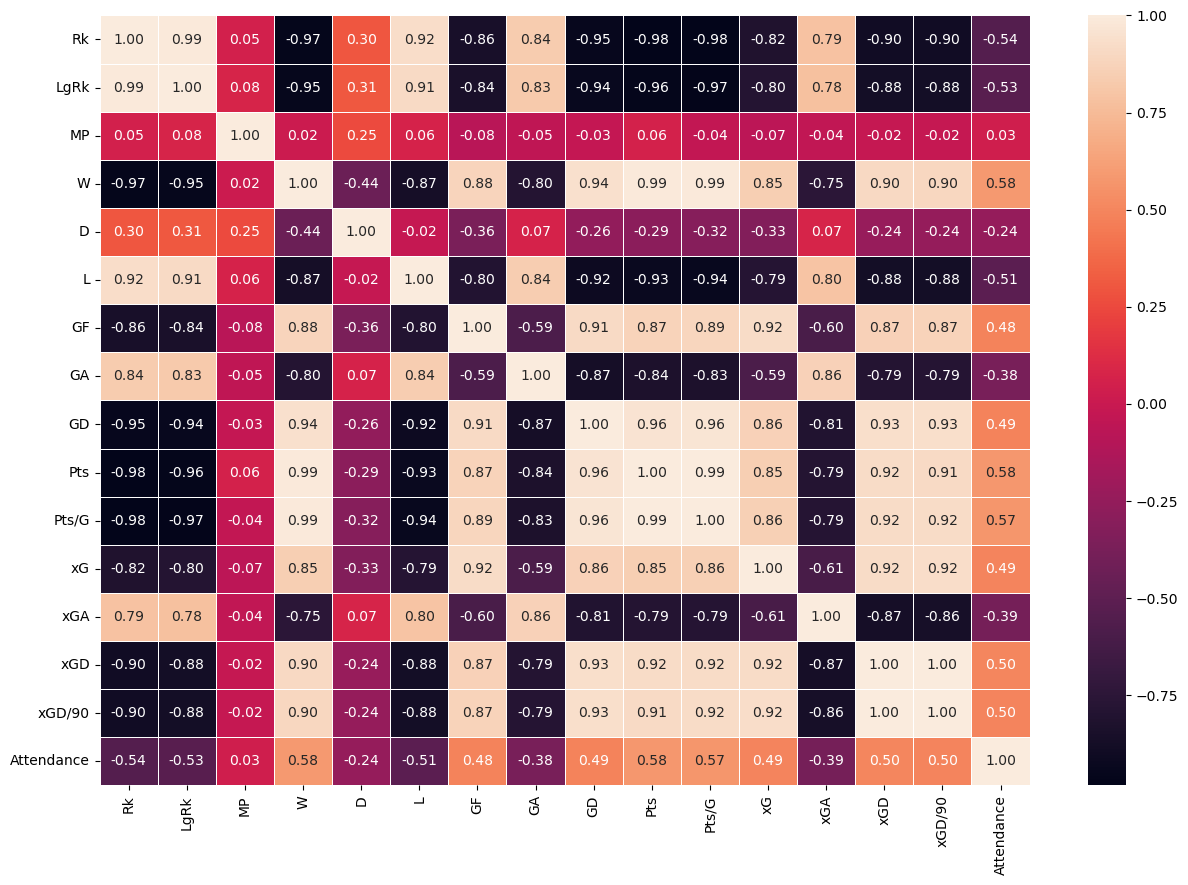

In [8]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5)

plt.show()

Hi ha una correlació bastant forta (tant positiva com negativa) entre les variables del dataset.

Agafem la varibale GF (gols a favor) i utilitzem el Test de Shapiro-Wilk per comprovar si aquestes dades (mostra) tenen una distribució gaussiana (distribució normal).

Hipòtesis:

- H0 (nula): la mostra té una distribució normal.
- H1 (alternativa): la mostra no té una distribució normal.

- Alpha (nivell de significancia) = 0.05 (5%).



Si el **p-value** és petit (menor que un nivell de significança definit (p < 0.05)), llavors hi ha evidència per a rebutjar la hipòtesi nul·la. Això significa que els resultats observats són poc probables que hagin ocorregut a causa de l'atzar i són més consistents amb la hipòtesi alternativa.

In [9]:
from scipy.stats import shapiro

stat, p = shapiro(df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
     print('La distribució probablement és normal')
else:
     print('La distribució probablement no és normal')

stat=0.943, p=0.000
La distribució probablement no és normal


Com podem observar, p < 0.05 , per tant rebutjem la hipòtesis nula i podem dir amb un 95% de confiança que la distribució de la mostra (gols a favor) **NO** és gaussiana.

Seguidament, veiem gràficament com es distribueix aquesta variable (clarament es visualitza com no segueix una distribució normal):

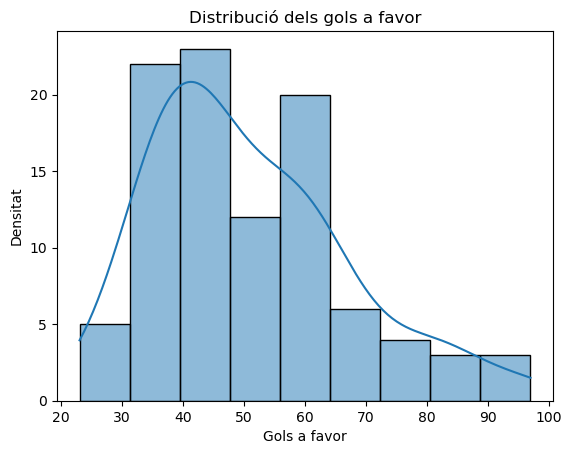

In [10]:
sns.histplot(df['GF'], kde=True)
plt.xlabel('Gols a favor')
plt.ylabel('Densitat')
plt.title('Distribució dels gols a favor')

plt.show()

### Exercici 2
***
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

En aquest exercici comprovarem si els gols a favor (GF) i els partits guanyats (W) tenen una relació lineal (al mapa de calor podem veure que tenen una correlació relativament alta). Per aquest cas utilitzarem el Test de Correlació de Pearson.

Primer mirem si ambdues variables segueixen una distribució normal (abans ja hem comprovat que GF no té una distribució normal).

In [11]:
stat, p = shapiro(df['W'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
     print('La distribució de W probablement és normal')
else:
     print('La distribució de W probablement no és normal')

stat=0.965, p=0.011
La distribució de W probablement no és normal


Com no segueixen una distribució gaussiana, no podem utilitzar el Test de Correlació de Pearson. En aquests casos s'ha d'utilitzar el Test de Spearman per saber si tenen una correlació significativa.

Hipòtesis:

- H0: les dues mostres són independents.

- H1: hi ha dependència entre les mostres.

- Alpha: 0.05

In [12]:
from scipy.stats import spearmanr

stat, p = spearmanr(df['W'], df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Les mostres són probablament independents')
else:
    print('Les mostres són probablament dependents')

stat=0.862, p=0.000
Les mostres són probablament dependents


El p-value és p < 0.05 , per tant rebutjem la hipòtesis nula i podem dir amb un 95% de confiança que les dues mostres (gols a favor i partits guanyats) tenen una relació dependent.

El Coeficient de Spearman és de 0.862, per tant, tenen una correlació positiva relativament alta.

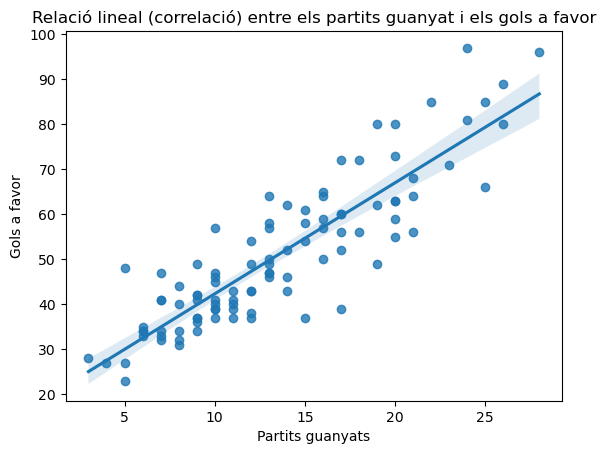

In [13]:
sns.regplot(x=df['W'], y=df['GF'])

plt.xlabel('Partits guanyats')
plt.ylabel('Gols a favor')
plt.title('Relació lineal (correlació) entre els partits guanyat i els gols a favor')

plt.show()

Podem veure gràficament com la regressió és lineal positiva amb un cert grau de dispersió.

### Exercici 3
***
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Mirarem si els gols a favor (GF), els gols en contra (GA) i els gols esperats (xG) tenen relació entre ells.

Primer de tot mirem si GA i xG segueixen una distribució normal (ja sabem que GF no és gaussiana).

In [14]:
stat, p = shapiro(df['xG'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
     print('La distribució de xG probablement és normal')
else:
     print('La distribució de xG probablement no és normal')

stat=0.940, p=0.000
La distribució de xG probablement no és normal


In [15]:
stat, p = shapiro(df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
     print('La distribució de GA probablement és normal')
else:
     print('La distribució de GA probablement no és normal')

stat=0.983, p=0.243
La distribució de GA probablement és normal


Ara realitzarem una ANOVA per veure si podem acceptar la nostra hipótesis.

Hipòtesis:

 - H0: Les mostres no tenen relació.
 - H1: Les mostres tenen relació.
 - Alpha: 0.05

In [16]:
from scipy.stats import f_oneway

stat, p = f_oneway(df['GF'], df['W'], df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probablement tenen relació entre elles')
else:
    print('Probablement no tenen relació entre elles')

stat=287.069, p=0.000
Probablement no tenen relació entre elles


Com podem veure, el p-values és p < 0.05, i per tant, rebutjem la hipòtesis nula i podem dir amb un 95% de confiança que les tres mostres (gols a favor (GF), gols en contra (GA) i gols esperats(xG)) tenen una distribució diferent.

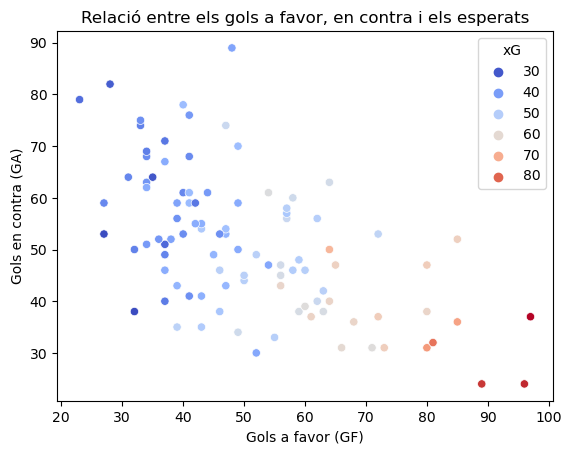

In [20]:
sns.scatterplot(data=df, x='GF', y='GA', hue='xG', palette='coolwarm')

plt.xlabel('Gols a favor (GF)')
plt.ylabel('Gols en contra (GA)')
plt.title('Relació entre els gols a favor, en contra i els esperats')

plt.show()

Visualment podem observar com les tres variables no tenen una relació lineal. Es pot apreciar una certa correlació amb tendencia negativa, però no es suficient per determinar-ho estadísticament.